## 과제: 피마 인디언 당뇨병 예측

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

diabetes_data = pd.read_csv('/content/diabetes.csv')
diabetes_data.head()
df=diabetes_data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [225]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [227]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [228]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
17           163      72             41             114      40.9  0.817                     47   1          1
15           136      70             32             110      37.1  0.153                     43   1          1
2            87       58             16             52       32.7  0.166                     25   0          1
                      0              23             0        28.9  0.773                     25   0          1
             85       65             0              0        39.6  0.930                     27   0          1
                                                                                                            ..
5            106      82             30             0        39.5  0.286                     38   0          1
             105      72             29             325      36.9  0.159                     28   0          1
      

In [229]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [230]:
#정확도

X_df = df[['Pregnancies',	'Glucose'	,'BloodPressure',	'SkinThickness'	,'Insulin'	,'BMI',	'DiabetesPedigreeFunction'	,'Age'	]]
y_df = df['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.2,random_state=0,stratify=y_df)
#선생님 여기서 테스트사이즈랑 랜덤스테이트 정하는 기준이 뭐에요?

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model=LogisticRegression()
model.fit(X_train,y_train) #clf =classifier

print("train accuracy:",model.score(X_train, y_train))
print("test accuracy:",model.score(X_test, y_test))
print("임신, 글루코스, 혈압, 피부두께, 인슐린, bmi, 비만 function, 나이 가 outcome 에 영향주는정도:",model.coef_)
# prediction=clf.precdict(X_test)
# print("Accuracy :{0:.4f}".format(accuracy_score(y_test,prediction)))
print("글루코스가 비만에 큰 영향을 준다")
prediction=model.predict(X_test)
#print(model.predcit(X_test))  #AttributeError: 'LogisticRegression' object has no attribute 'predcit' 라는 에러가 납니다. 


print("정확도:",accuracy_score(y_test,prediction))


train accuracy: 0.7801302931596091
test accuracy: 0.7792207792207793
임신, 글루코스, 혈압, 피부두께, 인슐린, bmi, 비만 function, 나이 가 outcome 에 영향주는정도: [[ 0.39208374  0.98618595 -0.22710601 -0.03488303 -0.04703761  0.62500042
   0.30693304  0.24335592]]
글루코스가 비만에 큰 영향을 준다
정확도: 0.7792207792207793


In [231]:
#교차행렬

print(confusion_matrix(y_test,prediction))

[[89 11]
 [23 31]]


In [232]:
cm = metrics.confusion_matrix(y_test, prediction)
cm

array([[89, 11],
       [23, 31]])

In [233]:
#정밀도
precison=precision_score(y_test,prediction)
print("정밀도:",precison)
print("재현율:",recall_score(y_test,prediction))


정밀도: 0.7380952380952381
재현율: 0.5740740740740741


In [234]:
print("F1 score:", f1_score(y_test,prediction))


F1 score: 0.6458333333333334


In [235]:
#auc

print("roc auc:",roc_auc_score(y_test, prediction))

roc auc: 0.732037037037037


In [236]:
outcome_1=model.predict_proba(X_test)[:,1]
curve1, curve2, curve3 = roc_curve(y_test, outcome_1)
#roc curve 부분이 이해가 전혀 되지가않습니다. 반환된 임계값 배열로우, 로우가 무슨뜻인지 모르겟습니다.
#샘플이 몇건 추출되고 임계값이 몇스텝으로 추출된다는 의미 자체를 모르겠습니다. 

curve3_index = np.arange(0, curve3.shape[0], 5) #np.arange(시작, 끝, 간격)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', curve3_index)
print('샘플용 10개의 임곗값: ', np.round(curve3[curve3_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(curve1[curve3_index], 3))
print('샘플 임곗값별 TPR: ', np.round(curve1[curve3_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40]
샘플용 10개의 임곗값:  [1.95 0.71 0.62 0.45 0.42 0.37 0.32 0.28 0.18]
샘플 임곗값별 FPR:  [0.   0.05 0.07 0.13 0.15 0.19 0.21 0.25 0.41]
샘플 임곗값별 TPR:  [0.   0.05 0.07 0.13 0.15 0.19 0.21 0.25 0.41]


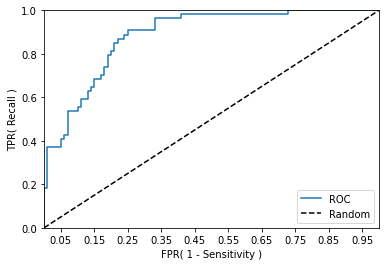

In [237]:
def roc_curve_plot(y_test , outcome_1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    curve1,curve2,curve3 = roc_curve(y_test ,outcome_1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(curve1,curve2, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, model.predict_proba(X_test)[:, 1] )